In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('trump.csv')

In [5]:
df.drop_duplicates(inplace=True)
df.fillna('unkown',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10360 non-null  int64 
 1   date        10360 non-null  object
 2   target      10360 non-null  object
 3   insult      10360 non-null  object
 4   tweet       10360 non-null  object
dtypes: int64(1), object(4)
memory usage: 485.6+ KB


In [7]:
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [70]:
df

,Unnamed: 0,date,target,insult,tweet,year
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015
...,...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...,2021
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they...",2021
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late...",2021
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...,2021


In [10]:
from pyecharts.charts import Bar,Map,Line,Page,Scatter
from pyecharts import options as opts
from pyecharts.globals import SymbolType,ThemeType
from pyecharts.charts import Grid

In [12]:
result = df['target'].value_counts()[:10].sort_values()
x_data = result.index.tolist()
y_data = result.values.tolist()

b = (Bar()
     .add_xaxis(x_data)
     .add_yaxis('',y_data)
     .set_global_opts(title_opts = opts.TitleOpts(title='被侮辱次数前十'))
     .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='right'))
     .reversal_axis()
)
grid = Grid(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
grid.add(b, grid_opts=opts.GridOpts(pos_left="20%"))
grid.render_notebook()

In [31]:
result = df[df['target'] == 'the-media']
result1 = result.groupby('year').year.count()
x_data = result1.index.tolist()
y_data = result1.values.tolist()

b = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        '',
        y_data,，
        label_opts=opts.LabelOpts(is_show=True),
    )
    .set_global_opts(title_opts = opts.TitleOpts(title='侮辱the-media推特数量的变化'))
    
)
b.render_notebook()

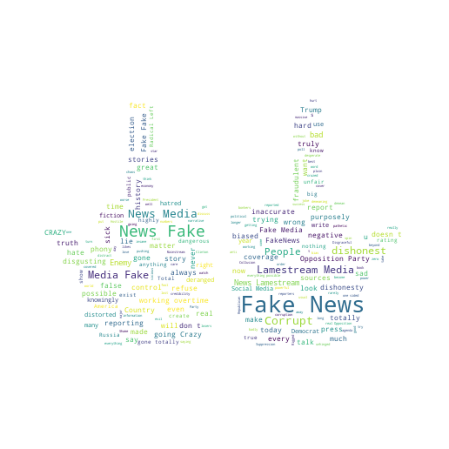

In [40]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from imageio import imread

# result = df[df['target'] == 'the-media']
media_text = " ".join(df[df.target=="the-media"].insult)
mask = imread('1.jpg')
wordcloud = WordCloud(background_color = 'white',mask=mask,width=1200,height=1200).generate(media_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [52]:
result = df[df['target'] == 'joe-biden']
result1 = result.groupby('year').year.count()
x_data = result1.index.tolist()
y_data = result1.values.tolist()

b = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        '',
        y_data,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .set_global_opts(title_opts = opts.TitleOpts(title='侮辱joe-biden推特数量的变化'))
    
)
b.render_notebook()

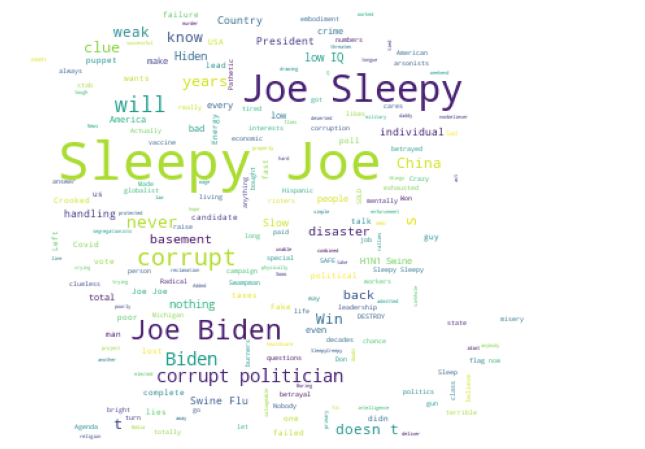

In [55]:
media_text = " ".join(df[df.target=="joe-biden"].insult)
mask = imread('2.jpeg')
wordcloud = WordCloud(background_color = 'white',mask=mask,width=1200,height=1200).generate(media_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [13]:
result1 = df.groupby('year').year.count()
x_data = result1.index.tolist()
y_data = result1.values.tolist()

b = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        '',
        y_data,
        label_opts=opts.LabelOpts(is_show=True),
    )
    .set_global_opts(title_opts = opts.TitleOpts(title='侮辱推特数量的变化'))
    
)
b.render_notebook()

In [15]:
result = df['date'].value_counts()[:10].sort_values()
x_data = result.index.tolist()
y_data = result.values.tolist()

b = (Bar()
     .add_xaxis(x_data)
     .add_yaxis('',y_data)
     .set_global_opts(title_opts = opts.TitleOpts(title='每天发侮辱推特次数前十'))
     .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='right'))
     .reversal_axis()
)
grid = Grid(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
grid.add(b, grid_opts=opts.GridOpts(pos_left="20%"))
grid.render_notebook()

In [25]:
result = df[df['date'] == '2020-10-12']
result = result['target'].value_counts().sort_values()
x_data = result.index.tolist()
y_data = result.values.tolist()

b = (Bar()
     .add_xaxis(x_data)
     .add_yaxis('',y_data)
     .set_global_opts(title_opts = opts.TitleOpts(title='2020-10-12被侮辱排行'))
     .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='right'))
     .reversal_axis()
)
grid = Grid(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
grid.add(b, grid_opts=opts.GridOpts(pos_left="20%"))
grid.render_notebook()

In [26]:
result = df[df['date'] == '2020-10-07']
result = result['target'].value_counts().sort_values()
x_data = result.index.tolist()
y_data = result.values.tolist()

b = (Bar()
     .add_xaxis(x_data)
     .add_yaxis('',y_data)
     .set_global_opts(title_opts = opts.TitleOpts(title='2020-10-07被侮辱排行'))
     .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='right'))
     .reversal_axis()
)
grid = Grid(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
grid.add(b, grid_opts=opts.GridOpts(pos_left="20%"))
grid.render_notebook()

In [27]:
result = df[df['date'] == '2020-09-02']
result = result['target'].value_counts().sort_values()
x_data = result.index.tolist()
y_data = result.values.tolist()

b = (Bar()
     .add_xaxis(x_data)
     .add_yaxis('',y_data)
     .set_global_opts(title_opts = opts.TitleOpts(title='2020-09-02被侮辱排行'))
     .set_series_opts(label_opts=opts.LabelOpts(is_show=True,position='right'))
     .reversal_axis()
)
grid = Grid(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
grid.add(b, grid_opts=opts.GridOpts(pos_left="20%"))
grid.render_notebook()

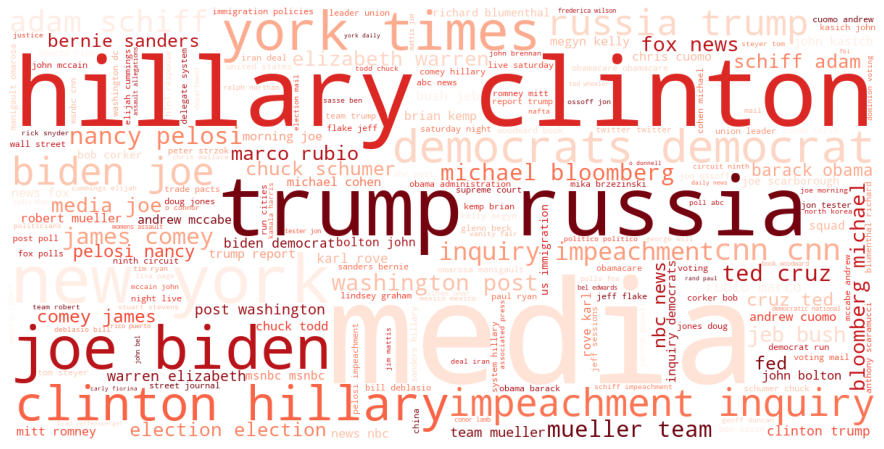

In [42]:
target_text=" ".join(df.target)
wordcloud = WordCloud(background_color = 'white',colormap = 'Reds',width=1200,height=600).generate(text=target_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

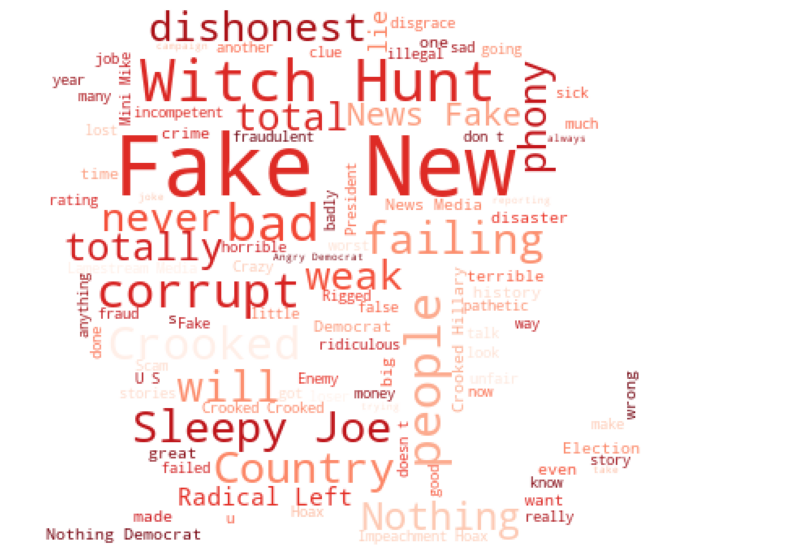

In [49]:
mask = imread('2.jpeg')
insult_text=" ".join(df.insult)
wordcloud = WordCloud(background_color = 'white',mask=mask,width=1200,height=1200,
max_words=100,colormap = 'Reds').generate(insult_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

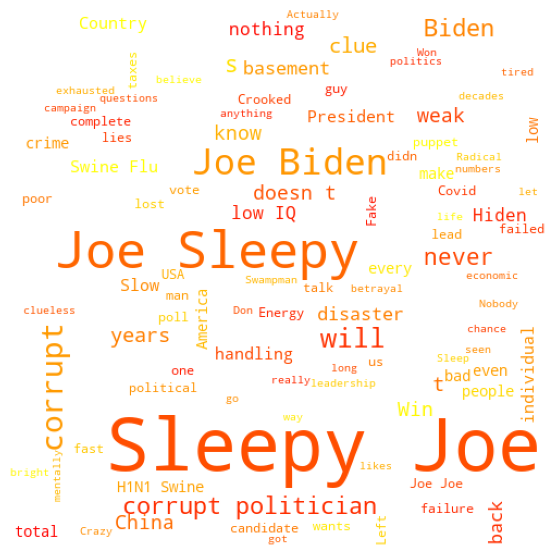

In [51]:
joe_text = " ".join(df[df.target=="joe-biden"].insult)
mask = imread('3.jpg')

wordcloud = WordCloud(background_color = 'white',mask=mask,width=1200,height=1200,
max_words=100,colormap = 'autumn').generate(joe_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()